# Auto Loan Default Prediction

#### By: Nathan Moore


## Introduction:
I am completing this work sample for the application process of the Junior Business Analsyt position at AUTO 1 Group. I specifically chose to complete this work sample because the Junior Business Analyst's main responsibility will be asset backed securities reporting, and completing this assessment will show my understanding of the risk associated with the underlying assets (auto loans).

This work sample is a past financial hackathon case study from L&T Financial Services. I will explain my reasoning for certain decisions and processes throughout this report.

## Problem Statement:
Financial institutions incur significant losses due to the default of vehicle loans. This has led to the tightening up of vehicle loan underwriting and increased vehicle loan rejection rates. The need for a better credit risk scoring model is also raised by these institutions. This warrants a study to estimate the determinants of vehicle loan default. A financial institution has hired you to accurately predict the probability of a loanee/borrower defaulting on a vehicle loan in the first EMI (Equated Monthly Instalments) on the due date. Doing so will ensure that clients capable of repayment are not rejected and important determinants can be identified which can be further used for minimising the default rates. The following information regarding the loan and loanee are provided in the datasets:

- Loanee Information (Demographic data like age, Identity proof etc.)
- Loan Information (Disbursal details, loan to value ratio etc.)
- Bureau data & history (Bureau score, number of active accounts, the status of other loans, credit history etc.)

## Dataset Column Descriptions:

- UniqueID - Identifier for customers
- loan_default - Payment default in the first EMI on due date
- disbursed_amount - Amount of Loan disbursed
- asset_cost - Cost of the Asset
- ltv - Loan to Value of the asset
- branch_id - Branch where the loan was disbursed
- supplier_id - Vehicle Dealer where the loan was disbursed
- manufacturer_id - Vehicle manufacturer(Hero, Honda, TVS etc.)
- Current_pincode - Current pincode of the customer
- Date.of.Birth - Date of birth of the customer
- Employment.Type - Employment Type of the customer (Salaried/Self Employed)
- DisbursalDate - Date of disbursement
- State_ID - State of disbursement
- Employee_code_ID - Employee of the organization who logged the disbursement
- MobileNo_Avl_Flag - if Mobile no. was shared by the customer then flagged as 1
- Aadhar_flag - if aadhar was shared by the customer then flagged as 1
- PAN_flag - if pan was shared by the customer then flagged as 1
- VoterID_flag - if voter was shared by the customer then flagged as 1
- Driving_flag - if DL was shared by the customer then flagged as 1
- Passport_flag - if passport was shared by the customer then flagged as 1
- PERFORM_CNS.SCORE - Bureau Score
- PERFORM_CNS.SCORE.DESCRIPTION - Bureau score description
- PRI.NO.OF.ACCTS - count of total loans taken by the customer at the time of disbursement Primary accounts are those which the customer has taken for his personal use
- PRI.ACTIVE.ACCTS - count of active loans taken by the customer at the time of disbursement
- PRI.OVERDUE.ACCTS - count of default accounts at the time of disbursement
- PRI.CURRENT.BALANCE - total Principal outstanding amount of the active loans at the time of disbursement
- PRI.SANCTIONED.AMOUNT - total amount that was sanctioned for all the loans at the time of disbursement
- PRI.DISBURSED.AMOUNT - total amount that was disbursed for all the loans at the time of disbursement
- SEC.NO.OF.ACCTS - count of total loans taken by the customer at the time of disbursement Secondary accounts are those which the customer act as a co-applicant or gaurantor
- SEC.ACTIVE.ACCTS - count of active loans taken by the customer at the time of disbursement
- SEC.OVERDUE.ACCTS - count of default accounts at the time of disbursement
- SEC.CURRENT.BALANCE - total Principal outstanding amount of the active loans at the time of disbursement
- SEC.SANCTIONED.AMOUNT - total amount that was sanctioned for all the loans at the time of disbursement
- SEC.DISBURSED.AMOUNT - total amount that was disbursed for all the loans at the time of disbursement
- PRIMARY.INSTAL.AMT - EMI Amount of the primary loan
- SEC.INSTAL.AMT - EMI Amount of the secondary loan
- NEW.ACCTS.IN.LAST.SIX.MONTHS - New loans taken by the customer in last 6 months before the disbursment
- DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS - Loans defaulted in the last 6 months
- AVERAGE.ACCT.AGE - Average loan tenure
- CREDIT.HISTORY.LENGTH - Time since first loan
- NO.OF_INQUIRIES - Enquries done by the customer for loans

## Datasets:
- train.csv - data for training the machine learning models

## Import Libraries:

In [129]:
#Import necessary libraries for the report
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Import library for splitting data
from sklearn.model_selection import train_test_split

#Import library for transforming data
from sklearn.preprocessing import OrdinalEncoder

#Import library for scoring models
from sklearn.metrics import accuracy_score

#Importing libraries for machine learning models
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

## Load and Preview Data:

In [130]:
#Import data
train_data_1 = pd.read_csv(r"C:\Users\Nathan\Documents\Python Projects\Auto Loan Default Prediction\train.csv")

In [136]:
#Display dataset
pd.set_option('display.max_columns', None)
train_data_1.head()

,UniqueID,disbursed_amount,asset_cost,ltv,branch_id,supplier_id,manufacturer_id,Current_pincode_ID,Date.of.Birth,Employment.Type,DisbursalDate,State_ID,Employee_code_ID,MobileNo_Avl_Flag,Aadhar_flag,PAN_flag,VoterID_flag,Driving_flag,Passport_flag,PERFORM_CNS.SCORE,PERFORM_CNS.SCORE.DESCRIPTION,PRI.NO.OF.ACCTS,PRI.ACTIVE.ACCTS,PRI.OVERDUE.ACCTS,PRI.CURRENT.BALANCE,PRI.SANCTIONED.AMOUNT,PRI.DISBURSED.AMOUNT,SEC.NO.OF.ACCTS,SEC.ACTIVE.ACCTS,SEC.OVERDUE.ACCTS,SEC.CURRENT.BALANCE,SEC.SANCTIONED.AMOUNT,SEC.DISBURSED.AMOUNT,PRIMARY.INSTAL.AMT,SEC.INSTAL.AMT,NEW.ACCTS.IN.LAST.SIX.MONTHS,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,AVERAGE.ACCT.AGE,CREDIT.HISTORY.LENGTH,NO.OF_INQUIRIES,loan_default
0,420825,50578,58400,89.55,67,22807,45,1441,01-01-84,Salaried,03-08-18,6,1998,1,1,0,0,0,0,0,No Bureau History Available,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
1,537409,47145,65550,73.23,67,22807,45,1502,31-07-85,Self employed,26-09-18,6,1998,1,1,0,0,0,0,598,I-Medium Risk,1,1,1,27600,50200,50200,0,0,0,0,0,0,1991,0,0,1,1yrs 11mon,1yrs 11mon,0,1
2,417566,53278,61360,89.63,67,22807,45,1497,24-08-85,Self employed,01-08-18,6,1998,1,1,0,0,0,0,0,No Bureau History Available,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
3,624493,57513,66113,88.48,67,22807,45,1501,30-12-93,Self employed,26-10-18,6,1998,1,1,0,0,0,0,305,L-Very High Risk,3,0,0,0,0,0,0,0,0,0,0,0,31,0,0,0,0yrs 8mon,1yrs 3mon,1,1
4,539055,52378,60300,88.39,67,22807,45,1495,09-12-77,Self employed,26-09-18,6,1998,1,1,0,0,0,0,0,No Bureau History Available,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,1,1


In [135]:
#Show statistics of dataset
train_data_1.describe().T

,count,mean,std,min,25%,50%,75%,max
UniqueID,233154.0,535917.573376,6.831569e+04,417428.00,476786.25,535978.5,595039.75,6.710840e+05
disbursed_amount,233154.0,54356.993528,1.297131e+04,13320.00,47145.00,53803.0,60413.00,9.905720e+05
asset_cost,233154.0,75865.068144,1.894478e+04,37000.00,65717.00,70946.0,79201.75,1.628992e+06
ltv,233154.0,74.746530,1.145664e+01,10.03,68.88,76.8,83.67,9.500000e+01
branch_id,233154.0,72.936094,6.983499e+01,1.00,14.00,61.0,130.00,2.610000e+02
supplier_id,233154.0,19638.635035,3.491950e+03,10524.00,16535.00,20333.0,23000.00,2.480300e+04
manufacturer_id,233154.0,69.028054,2.214130e+01,45.00,48.00,86.0,86.00,1.560000e+02
Current_pincode_ID,233154.0,3396.880247,2.238148e+03,1.00,1511.00,2970.0,5677.00,7.345000e+03
State_ID,233154.0,7.262243,4.482230e+00,1.00,4.00,6.0,10.00,2.200000e+01
Employee_code_ID,233154.0,1549.477148,9.752613e+02,1.00,713.00,1451.0,2362.00,3.795000e+03


L&T Financial Services is an Indian company that operates in Indian Rupees, so the mean asset cost looks alarmingly high until you remember that the cost are denominated in Indian Rupees, and not US Dollars or Euros.

In [137]:
#Missing values in each column
train_data_1.isna().sum()

UniqueID                                  0
disbursed_amount                          0
asset_cost                                0
ltv                                       0
branch_id                                 0
supplier_id                               0
manufacturer_id                           0
Current_pincode_ID                        0
Date.of.Birth                             0
Employment.Type                        7661
DisbursalDate                             0
State_ID                                  0
Employee_code_ID                          0
MobileNo_Avl_Flag                         0
Aadhar_flag                               0
PAN_flag                                  0
VoterID_flag                              0
Driving_flag                              0
Passport_flag                             0
PERFORM_CNS.SCORE                         0
PERFORM_CNS.SCORE.DESCRIPTION             0
PRI.NO.OF.ACCTS                           0
PRI.ACTIVE.ACCTS                

The Employment Type column is the only column with missing data, but it is not missing much data compared to the number of rows in the dataset.

In [138]:
#Dataset inofrmation, including data types
train_data_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233154 entries, 0 to 233153
Data columns (total 41 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   UniqueID                             233154 non-null  int64  
 1   disbursed_amount                     233154 non-null  int64  
 2   asset_cost                           233154 non-null  int64  
 3   ltv                                  233154 non-null  float64
 4   branch_id                            233154 non-null  int64  
 5   supplier_id                          233154 non-null  int64  
 6   manufacturer_id                      233154 non-null  int64  
 7   Current_pincode_ID                   233154 non-null  int64  
 8   Date.of.Birth                        233154 non-null  object 
 9   Employment.Type                      225493 non-null  object 
 10  DisbursalDate                        233154 non-null  object 
 11  State_ID     

The dataframe is mainly comprised of numerical data. There 6 columns with 'object' data types, but most of these columns are realted to calendar dates. There are only 2 columns with categorical words that will need to be One-Hot Encoded or Ordinal Encoded later on.

In [139]:
#Size of dataset
train_data_1.shape

(233154, 41)

This is a large dataset, so this might effect some analysis decisions throughout the report.

## Analyze the Target Column and Dataframe:

The target column in the Training dataframe is "loan_default". This column shows which borrowers defaulted on the car loan on the due date for the first EMI. A "1" means that the borrower defaulted, and a "0" means that they did not default on the loan.

In [140]:
#Count of loan defaults
train_data_1.loan_default.value_counts()

0    182543
1     50611
Name: loan_default, dtype: int64

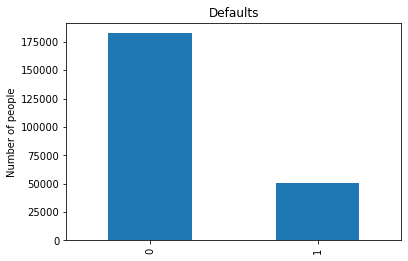

In [141]:
#Plot of loan defaults
train_data_1.loan_default.value_counts().plot(kind='bar')
plt.title('Defaults')
plt.ylabel('Number of people')
plt.show()

In the Training dataframe, 50,611 people defaulted on their loan, which is 21.7% of the borrowers. This number must improve because the financing institution incorrectly authorized 50,611 loans to people who could not pay back the first payment of the loan. The financing institution must improve their loan authentication process to save company funds.

In [142]:
#Seperating loan default data
default_df = train_data_1.query("loan_default == 1")
no_default_df = train_data_1.query("loan_default == 0")

Now, I have seperated the "loan_default" column responses. This will allow me to compare the statistics of the borrowers who defaulted and did not default.

In [143]:
#Default dataset
default_df.describe().T

,count,mean,std,min,25%,50%,75%,max
UniqueID,50611.0,540309.058525,7.083188e+04,417439.0,477773.000,544405.00,604090.50,6.586710e+05
disbursed_amount,50611.0,56270.473869,1.215026e+04,13369.0,49303.000,55459.00,61947.00,1.913920e+05
asset_cost,50611.0,76378.176661,1.868050e+04,37000.0,65894.000,71326.00,80061.50,2.811640e+05
ltv,50611.0,76.883322,1.032777e+01,15.3,72.055,79.06,84.68,9.500000e+01
branch_id,50611.0,76.940566,7.195904e+01,1.0,16.000,64.00,135.00,2.610000e+02
supplier_id,50611.0,19820.058762,3.452023e+03,10524.0,16680.000,20597.00,23108.00,2.480300e+04
manufacturer_id,50611.0,67.975164,2.226481e+01,45.0,45.000,51.00,86.00,1.530000e+02
Current_pincode_ID,50611.0,3517.675920,2.246722e+03,1.0,1595.000,2995.00,5823.00,7.343000e+03
State_ID,50611.0,7.671475,4.557574e+00,1.0,4.000,6.00,12.00,2.200000e+01
Employee_code_ID,50611.0,1587.736954,9.796935e+02,1.0,738.000,1512.00,2414.00,3.795000e+03


In [144]:
#No default dataset
no_default_df.describe().T

,count,mean,std,min,25%,50%,75%,max
UniqueID,182543.0,534700.011186,6.755116e+04,417428.00,476510.00,533986.0,592566.50,671084.0
disbursed_amount,182543.0,53826.471111,1.314070e+04,13320.00,46369.00,53303.0,59947.00,990572.0
asset_cost,182543.0,75722.806128,1.901500e+04,37000.00,65680.00,70845.0,78999.00,1628992.0
ltv,182543.0,74.154093,1.168145e+01,10.03,68.02,76.0,83.16,95.0
branch_id,182543.0,71.825833,6.919373e+01,1.00,13.00,61.0,121.00,261.0
supplier_id,182543.0,19588.334360,3.501284e+03,10524.00,16445.00,20289.0,22995.00,24803.0
manufacturer_id,182543.0,69.319974,2.209812e+01,45.00,48.00,86.0,86.00,156.0
Current_pincode_ID,182543.0,3363.389015,2.234615e+03,1.00,1509.00,2958.0,5638.00,7345.0
State_ID,182543.0,7.148781,4.454475e+00,1.00,4.00,6.0,9.00,22.0
Employee_code_ID,182543.0,1538.869417,9.737654e+02,1.00,704.00,1436.0,2345.00,3794.0


While comparing the figures, a few things caught my eye:

- The mean ltv figure is higher for people who defaulted on the loan, so people who have a lower down payment are more frequently defaulting.
- The mean Bureau Score is lower for people who are defaulting, so people with lower credit Bureau Scores are more likely to default, which is logical.
- People who default have less active loans and are less likely to open new accounts, so people who are new to borrowing and have not demostrated reliability in repaying loans are more likely to default.

None of my observations were drasticly different, so I do not expect to find strong correlations, but I will check.

<AxesSubplot:>

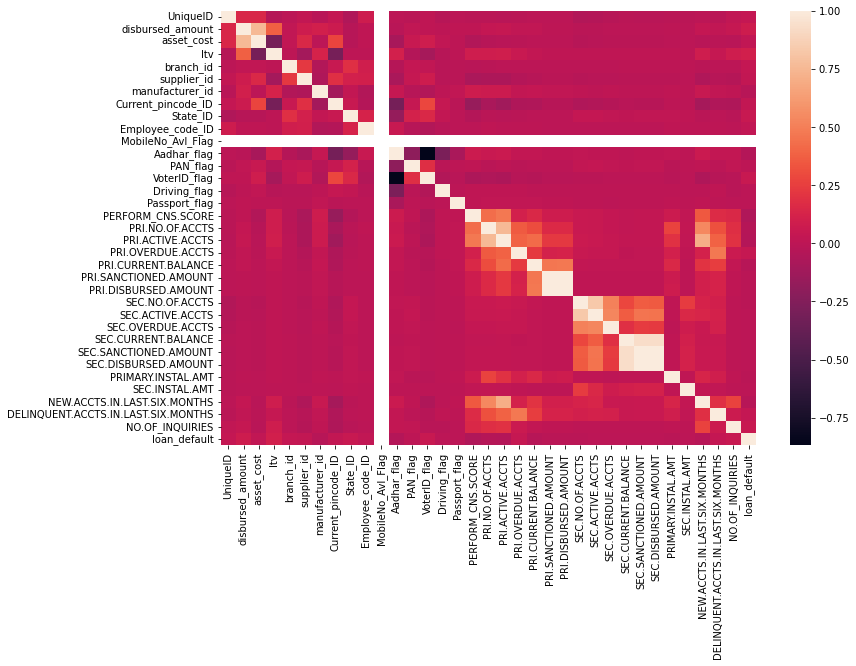

In [68]:
#Data Correlation
plt.figure(figsize=(12,8))
sns.heatmap(train_data_1.corr())

In [145]:
#Correlation matrix sorted
corr_matrix = train_data_1.corr()
corr_matrix['loan_default'].sort_values(ascending = False)

loan_default                           1.000000
ltv                                    0.098208
disbursed_amount                       0.077675
State_ID                               0.048075
VoterID_flag                           0.043747
NO.OF_INQUIRIES                        0.043678
PRI.OVERDUE.ACCTS                      0.040872
DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS    0.034462
UniqueID                               0.033848
branch_id                              0.030193
Current_pincode_ID                     0.028419
supplier_id                            0.027357
Employee_code_ID                       0.020657
asset_cost                             0.014261
PAN_flag                               0.002046
SEC.OVERDUE.ACCTS                     -0.001371
SEC.INSTAL.AMT                        -0.001548
SEC.CURRENT.BALANCE                   -0.005531
Driving_flag                          -0.005821
SEC.ACTIVE.ACCTS                      -0.005993
SEC.DISBURSED.AMOUNT                  -0

The columns are not strongly correlated or uncorrelated. This indicates that a regression could be a good prediction tool because multicollinearity will not affect the results.

## Cleaning Dataframe:

First, we will drop the missing values because there are relatively few rows with missing information, so the machine learning model will still have plenty of information to fit to the data nicely.

In [146]:
#Dropping missing values
train_data_2 = train_data_1.dropna()
train_data_2.shape

(225493, 41)

In [147]:
#Unique values per column
train_data_2.nunique()

UniqueID                               225493
disbursed_amount                        24228
asset_cost                              45415
ltv                                      6541
branch_id                                  82
supplier_id                              2945
manufacturer_id                            11
Current_pincode_ID                       6659
Date.of.Birth                           14417
Employment.Type                             2
DisbursalDate                              84
State_ID                                   22
Employee_code_ID                         3269
MobileNo_Avl_Flag                           1
Aadhar_flag                                 2
PAN_flag                                    2
VoterID_flag                                2
Driving_flag                                2
Passport_flag                               2
PERFORM_CNS.SCORE                         573
PERFORM_CNS.SCORE.DESCRIPTION              20
PRI.NO.OF.ACCTS                   

Next, we will drop the "MobileNo_Avl_Flag" column because it has only one unique value in the column and is completely unnecessary. The "Employee_code_ID", "branch_id", "State_ID", and "supplier_id" columns are most likely less useful because they are not very relevent to the loan default column, but I will keep these columns in the dataframe just in case there are any geographical default trends for the machine learning model to notice. 

In [148]:
#Drop unnecessary column
train_data_3 = train_data_2.drop('MobileNo_Avl_Flag', axis=1)

Next, I will rename some of the columns to make them easier to work with. Underscores in column names are easier to manipulate.

In [149]:
#Fix column names
train_data_3.columns = train_data_3.columns.str.replace('.','_')
train_data_3.columns

C:\Users\Nathan\AppData\Local\Temp\ipykernel_23732\2178691041.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  train_data_3.columns = train_data_3.columns.str.replace('.','_')


Index(['UniqueID', 'disbursed_amount', 'asset_cost', 'ltv', 'branch_id',
       'supplier_id', 'manufacturer_id', 'Current_pincode_ID', 'Date_of_Birth',
       'Employment_Type', 'DisbursalDate', 'State_ID', 'Employee_code_ID',
       'Aadhar_flag', 'PAN_flag', 'VoterID_flag', 'Driving_flag',
       'Passport_flag', 'PERFORM_CNS_SCORE', 'PERFORM_CNS_SCORE_DESCRIPTION',
       'PRI_NO_OF_ACCTS', 'PRI_ACTIVE_ACCTS', 'PRI_OVERDUE_ACCTS',
       'PRI_CURRENT_BALANCE', 'PRI_SANCTIONED_AMOUNT', 'PRI_DISBURSED_AMOUNT',
       'SEC_NO_OF_ACCTS', 'SEC_ACTIVE_ACCTS', 'SEC_OVERDUE_ACCTS',
       'SEC_CURRENT_BALANCE', 'SEC_SANCTIONED_AMOUNT', 'SEC_DISBURSED_AMOUNT',
       'PRIMARY_INSTAL_AMT', 'SEC_INSTAL_AMT', 'NEW_ACCTS_IN_LAST_SIX_MONTHS',
       'DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS', 'AVERAGE_ACCT_AGE',
       'CREDIT_HISTORY_LENGTH', 'NO_OF_INQUIRIES', 'loan_default'],
      dtype='object')

Next, I must fix the columns related to dates and length of time. This will make the data easier to manipulate and interpret in the machine learning models. I will change the "Date_of_Birth" column to ages, and then I will change the "CREDIT_HISTORY_LENGTH" and "AVERAGE_ACCT_AGE" columns to the number of months passed.

In [150]:
#Change the Disbursal Date column to a float value
train_data_3['DisbursalDate'] = pd.to_datetime(train_data_3['DisbursalDate'])    
train_data_3['disbursal_date_delta'] = (train_data_3['DisbursalDate'] - train_data_3['DisbursalDate'].min())  / np.timedelta64(1,'D')
train_data_4 = train_data_3.drop(['DisbursalDate'],axis=1)

In [151]:
#Change the Date of Birth column to an age value
now = pd.Timestamp('now')
train_data_4['Date_of_Birth'] = pd.to_datetime(train_data_4['Date_of_Birth'], format='%d-%m-%y')
train_data_4['Borrower_Age'] = (now - train_data_4['Date_of_Birth']).astype('<m8[Y]')
train_data_5 = train_data_4.drop(['Date_of_Birth'],axis=1)
train_data_5['Borrower_Age'].head()

0    39.0
1    37.0
2    37.0
3    29.0
4    45.0
Name: Borrower_Age, dtype: float64

In [152]:
#Create a function for changing the string to month values
def month_formula(col):
    yr = int(col.split()[0].replace('yrs',''))
    month = int(col.split()[1].replace('mon',''))
    return yr*12+month

def total_months_data(data):
    data['CREDIT_HISTORY_LENGTH'] = data['CREDIT_HISTORY_LENGTH'].apply(month_formula)
    data['AVERAGE_ACCT_AGE'] = data['AVERAGE_ACCT_AGE'].apply(month_formula)

total_months_data(train_data_5)
train_data_5.head()

,UniqueID,disbursed_amount,asset_cost,ltv,branch_id,supplier_id,manufacturer_id,Current_pincode_ID,Employment_Type,State_ID,Employee_code_ID,Aadhar_flag,PAN_flag,VoterID_flag,Driving_flag,Passport_flag,PERFORM_CNS_SCORE,PERFORM_CNS_SCORE_DESCRIPTION,PRI_NO_OF_ACCTS,PRI_ACTIVE_ACCTS,PRI_OVERDUE_ACCTS,PRI_CURRENT_BALANCE,PRI_SANCTIONED_AMOUNT,PRI_DISBURSED_AMOUNT,SEC_NO_OF_ACCTS,SEC_ACTIVE_ACCTS,SEC_OVERDUE_ACCTS,SEC_CURRENT_BALANCE,SEC_SANCTIONED_AMOUNT,SEC_DISBURSED_AMOUNT,PRIMARY_INSTAL_AMT,SEC_INSTAL_AMT,NEW_ACCTS_IN_LAST_SIX_MONTHS,DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS,AVERAGE_ACCT_AGE,CREDIT_HISTORY_LENGTH,NO_OF_INQUIRIES,loan_default,disbursal_date_delta,Borrower_Age
0,420825,50578,58400,89.55,67,22807,45,1441,Salaried,6,1998,1,0,0,0,0,0,No Bureau History Available,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,59.0,39.0
1,537409,47145,65550,73.23,67,22807,45,1502,Self employed,6,1998,1,0,0,0,0,598,I-Medium Risk,1,1,1,27600,50200,50200,0,0,0,0,0,0,1991,0,0,1,23,23,0,1,261.0,37.0
2,417566,53278,61360,89.63,67,22807,45,1497,Self employed,6,1998,1,0,0,0,0,0,No Bureau History Available,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,37.0
3,624493,57513,66113,88.48,67,22807,45,1501,Self employed,6,1998,1,0,0,0,0,305,L-Very High Risk,3,0,0,0,0,0,0,0,0,0,0,0,31,0,0,0,8,15,1,1,291.0,29.0
4,539055,52378,60300,88.39,67,22807,45,1495,Self employed,6,1998,1,0,0,0,0,0,No Bureau History Available,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,261.0,45.0


Next, we will look at the unique values in the "PERFORM_CNS_SCORE_DESCRIPTION" column. While previewing the data, I noticed that there are many values related to missing information. I want to see if any data can be dropped or simplified to make the machine learning model more accurate.

In [153]:
#Unique values in categorical column
train_data_5['PERFORM_CNS_SCORE_DESCRIPTION'].unique()

array(['No Bureau History Available', 'I-Medium Risk', 'L-Very High Risk',
       'A-Very Low Risk',
       'Not Scored: Not Enough Info available on the customer',
       'D-Very Low Risk', 'M-Very High Risk', 'B-Very Low Risk',
       'C-Very Low Risk', 'E-Low Risk', 'H-Medium Risk', 'F-Low Risk',
       'K-High Risk',
       'Not Scored: No Activity seen on the customer (Inactive)',
       'Not Scored: Sufficient History Not Available',
       'Not Scored: No Updates available in last 36 months', 'G-Low Risk',
       'J-High Risk', 'Not Scored: Only a Guarantor',
       'Not Scored: More than 50 active Accounts found'], dtype=object)

In [154]:
#Count of unique values
train_data_5['PERFORM_CNS_SCORE_DESCRIPTION'].value_counts()

No Bureau History Available                                111773
C-Very Low Risk                                             15715
A-Very Low Risk                                             13790
D-Very Low Risk                                             11134
B-Very Low Risk                                              9032
M-Very High Risk                                             8632
F-Low Risk                                                   8309
K-High Risk                                                  8107
H-Medium Risk                                                6695
E-Low Risk                                                   5695
I-Medium Risk                                                5440
G-Low Risk                                                   3902
Not Scored: Sufficient History Not Available                 3671
J-High Risk                                                  3667
Not Scored: Not Enough Info available on the customer        3557
Not Scored

There are 6 unique values related to not scoring a borrower. Since these values are closely related, I will combine all these values into one value called "Not Scored". I have decided not to drop the value named "No Bureau History Available" because it would delete too much information from the dataset that could be helpful.

In [155]:
#Combining some categories into one category
train_data_5['PERFORM_CNS_SCORE_DESCRIPTION'].replace(to_replace=['Not Scored: More than 50 active Accounts found', 'Not Scored: No Activity seen on the customer (Inactive)', 'Not Scored: No Updates available in last 36 months', 'Not Scored: Not Enough Info available on the customer', 'Not Scored: Only a Guarantor', 'Not Scored: Sufficient History Not Available', 'Not Scored: Not Enough Info available on the customer'], value = 'Not Scored', inplace = True)

## Split the Dataframe:

First, I will take a random sample of the dataframe. Normally, I would not take a random sample, but the dataframe is way too large for my 8GB RAM computer to perform machine learning models. To prevent my computer from crashing, I will take a sample of 10000 rows.

In [156]:
#Creating a smaller sample of dataset
train_data_random_sample = train_data_5.sample(n = 10000, random_state = 2)
train_data_random_sample.shape

(10000, 40)

Now, I will split the dataframe before encoding the categorical columns to prevent data leakage.

In [157]:
#Splitting the data
X = train_data_random_sample.drop('loan_default',axis=1)
y = train_data_random_sample['loan_default']  

X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.8, test_size=0.2, random_state=0)

## Ordinal Encoding:

I must ordinal encode the "PERFORM_CNS_SCORE_DESCRIPTION" and "Employment_Type" columns because they are categorical with object type data. I am ordinal encoding and not one-hot encoding because it will keep my dataframe small for my computer.

First, I must make sure that the same column values appear in the training and test data.

In [158]:
#Testing to see if each categorical column has the same values in the training and test datasets
print("Unique values in 'PERFORM_CNS_SCORE_DESCRIPTION' column in training data:", X_train['PERFORM_CNS_SCORE_DESCRIPTION'].unique())
print("\nUnique values in 'PERFORM_CNS_SCORE_DESCRIPTION' column in test data:", X_test['PERFORM_CNS_SCORE_DESCRIPTION'].unique())

print("\nUnique values in 'Employment_Type' column in training data:", X_train['Employment_Type'].unique())
print("\nUnique values in 'Employment_Type' column in test data:", X_test['Employment_Type'].unique())

Unique values in 'PERFORM_CNS_SCORE_DESCRIPTION' column in training data: ['Not Scored' 'B-Very Low Risk' 'No Bureau History Available'
 'D-Very Low Risk' 'F-Low Risk' 'K-High Risk' 'M-Very High Risk'
 'H-Medium Risk' 'E-Low Risk' 'J-High Risk' 'I-Medium Risk'
 'A-Very Low Risk' 'C-Very Low Risk' 'G-Low Risk' 'L-Very High Risk']

Unique values in 'PERFORM_CNS_SCORE_DESCRIPTION' column in test data: ['No Bureau History Available' 'K-High Risk' 'M-Very High Risk'
 'E-Low Risk' 'C-Very Low Risk' 'D-Very Low Risk' 'A-Very Low Risk'
 'H-Medium Risk' 'I-Medium Risk' 'L-Very High Risk' 'G-Low Risk'
 'F-Low Risk' 'B-Very Low Risk' 'Not Scored' 'J-High Risk']

Unique values in 'Employment_Type' column in training data: ['Self employed' 'Salaried']

Unique values in 'Employment_Type' column in test data: ['Self employed' 'Salaried']


The training and test data have the same column unique values, so there will be no problems with ordinal encoding these columns.

In [159]:
#Ordinal Encoding data
from sklearn.preprocessing import OrdinalEncoder

categorical_cols = ['PERFORM_CNS_SCORE_DESCRIPTION', 'Employment_Type']

ordinal_encoder = OrdinalEncoder()
X_train[categorical_cols] = ordinal_encoder.fit_transform(X_train[categorical_cols])
X_test[categorical_cols] = ordinal_encoder.transform(X_test[categorical_cols])

Now, the categorical columns are ordinal encoded and the data is preprocessed.

## Machine Learning Models:

Next, I fill create a function for training the data. Then, I will run the data through a few machine learning models to see which one provides the best results.

In [161]:
#Creating function for training models
accuracy = {}

def train_model(model, model_name):
    print(model_name)
    
    model = model.fit(X_train, y_train)
    preds = model.predict(X_test)
    
    acc = accuracy_score(y_test, preds)*100
    accuracy[model_name] = acc
    print('accuracy_score',acc)

## Random Forest Classifier:

In [117]:
rf_model = RandomForestClassifier(n_estimators = 500, oob_score=True, random_state=0)

train_model(rf_model, 'Random Forest Classifier')

Random Forest Classifier
accuracy_score 78.35


## Logisitic Rregression:

In [132]:
lr_model = LogisticRegression(C=1.0, class_weight=None,fit_intercept=True,max_iter=3000)

train_model(lr_model, 'Logistic Regression')

Logistic Regression
accuracy_score 78.14999999999999


## Decision Tree Classifier:

In [134]:
dt_model = DecisionTreeClassifier(criterion='gini', max_depth=25, min_samples_split=4,
                            min_samples_leaf=2)

train_model(dt_model, 'Decision Tree Classifier')

Decision Tree Classifier
accuracy_score 69.45


## Conclusion:

The Random Forest and Logistic Regression models performed the best, but I am convinced that the Logisitic Regression would have been the most accurate model if my computer could handle running the model with the full dataset. Using these models will help to accurately predict which borrowers will default in the first EMI on the due date.